In [1]:
import pandas as pd
import os

In [2]:

inputs = [
	"data/Lijn 1 laaste 12 maanden.csv",
	#"data/Lijn 2 laatste 12 maanden.csv",
	#"data/Lijn 3 laatste 12 maanden.csv"
]

def column_mapper(column):
	parts = column.split('.')
	return parts[len(parts)-1]

def add_input(line, path, output): 
	df = pd.read_csv(path)
	
	# Rename the column names
	df = df.rename(columns = column_mapper)

	df[ f"Line {line}"] = 1
	output = pd.concat([df, output])
	return output

output = pd.DataFrame()
for i in range(len(inputs)):
	output = add_input(i+1, inputs[i], output)

for i in range(len(inputs)):
	line_col_name = f"Line {i+1}"
	output[line_col_name] = output[line_col_name].fillna(0)
	output[line_col_name] = output[line_col_name].astype(int)

output = output.drop(columns=["DateTime", "Density_Max", "Density_Min"])
output.describe()

,Density_Target,OUT,PV,SP,Line 3,Line 2,Line 1
count,41454.000000,41454.000000,41454.000000,41454.000000,41454.000000,41454.000000,41454.000000
mean,415.121146,47.577420,8069.369762,8064.097554,0.331789,0.337386,0.330825
std,55.607472,11.669626,1258.047414,1244.658443,0.470862,0.472824,0.470516
min,320.000000,0.000000,4952.303711,5000.000000,0.000000,0.000000,0.000000
25%,376.000000,38.118112,7014.075806,7000.000000,0.000000,0.000000,0.000000
50%,416.000000,47.067852,7955.698242,8000.000000,0.000000,0.000000,0.000000
75%,456.000000,56.109455,8859.770996,8800.000000,1.000000,1.000000,1.000000
max,528.000000,80.000000,39643.585938,11000.000000,1.000000,1.000000,1.000000


In [3]:
output.head()

,Density_Target,OUT,PV,SP,Line 3,Line 2,Line 1
0,432,55.166412,8000.592285,8000,1,0,0
1,432,55.268192,7960.954590,8000,1,0,0
2,432,55.167942,7975.919922,8000,1,0,0
3,432,55.017338,8024.747070,8000,1,0,0
4,432,55.264465,8068.057129,8000,1,0,0


In [4]:
output = output[output["OUT"] > 0]

output.describe()

,Density_Target,OUT,PV,SP,Line 3,Line 2,Line 1
count,41453.000000,41453.000000,41453.000000,41453.000000,41453.000000,41453.000000,41453.000000
mean,415.122862,47.578568,8068.608075,8064.135286,0.331773,0.337394,0.330833
std,55.607045,11.667426,1248.467317,1244.649748,0.470856,0.472826,0.470519
min,320.000000,20.364277,4952.303711,5000.000000,0.000000,0.000000,0.000000
25%,376.000000,38.118561,7014.075684,7000.000000,0.000000,0.000000,0.000000
50%,416.000000,47.068542,7955.688477,8000.000000,0.000000,0.000000,0.000000
75%,456.000000,56.109528,8859.576172,8800.000000,1.000000,1.000000,1.000000
max,528.000000,80.000000,11866.179688,11000.000000,1.000000,1.000000,1.000000


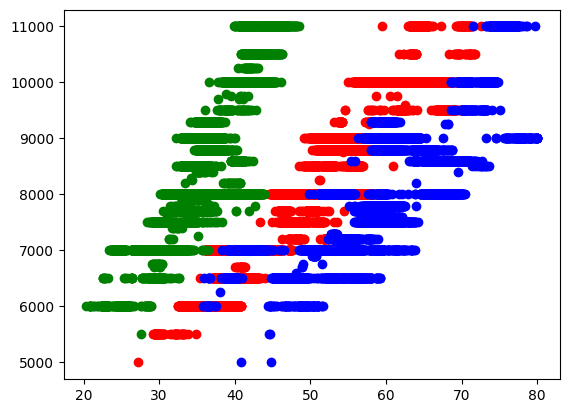

In [5]:
import matplotlib.pyplot as plt

colors = ["r", "g", "b"]
for i in range(len(colors)):
	d = output[output[f"Line {i+1}"] == 1];
	plt.scatter(d["OUT"], d["SP"], color=colors[i])

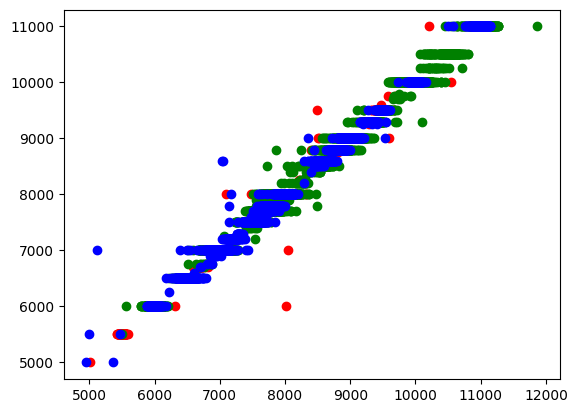

In [6]:
for i in range(len(colors)):
	d = output[output[f"Line {i+1}"] == 1];
	plt.scatter(d["PV"], d["SP"], color=colors[i])

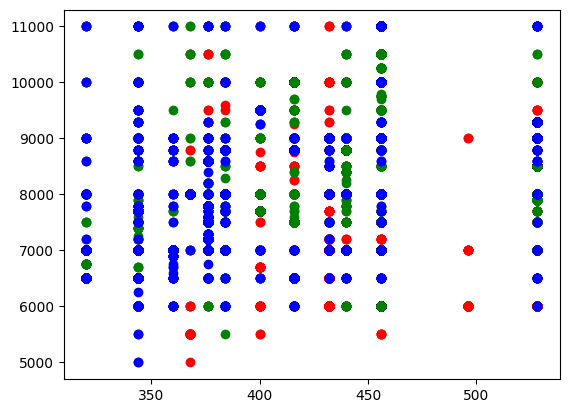

In [7]:
for i in range(len(colors)):
	d = output[output[f"Line {i+1}"] == 1];
	plt.scatter(d["Density_Target"], d["SP"], color=colors[i])

In [8]:

if (os.path.exists("out") == False):
	os.mkdir("out")

output = output.rename({
	"SP": "Dry_Feed_Rate_PID.SP",
	"OUT": "Dry_Feed_Rate_PID.OUT",
	"PV": "Dry_Feed_Rate_PID.PV",
}, axis=1)

#output['Line 1'] = output['Line 1'].astype(int) 

output.to_csv("out/etl.csv", index=False, sep=";", decimal=",")